In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("bases/201910_BolsaFamilia_Pagamentos.csv", encoding ='latin1', engine='python', 
                 quotechar='"', delimiter=";", decimal=",", nrows=10000)

In [3]:
df.head()

,MÊS REFERÊNCIA,MÊS COMPETÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,201910,201810,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
1,201910,201810,AP,617,TARTARUGALZINHO,20173798130,FRANCINETE DA SILVA OLIVEIRA,171.0
2,201910,201810,BA,3949,UNA,20423324971,JANETE PASSOS CARVALHO,294.0
3,201910,201810,DF,9701,BRASILIA,23828268516,JONNY JOSE ISTURDIS ARVELAEZ,212.0
4,201910,201810,ES,5701,VIANA,14085487279,GERUZA CORREA SALES,253.0


In [4]:
df['VALOR PARCELA'].sum()

19629464.0

In [5]:
df[['UF']].count()

UF    100000
dtype: int64

In [6]:
df.groupby('UF').sum()['VALOR PARCELA']

UF
AC    10852828.0
AL      354931.0
AM      160512.0
AP       52612.0
BA     1040618.0
CE      676278.0
DF       52485.0
ES      119316.0
GO      244929.0
MA      521897.0
MG      826175.0
MS       56452.0
MT      129218.0
PA      555898.0
PB      340420.0
PE      529251.0
PI      227760.0
PR      258288.0
RJ      780151.0
RN      205927.0
RO       22560.0
RR       81976.0
RS      190376.0
SC      141301.0
SE       93451.0
SP     1061658.0
TO       52196.0
Name: VALOR PARCELA, dtype: float64

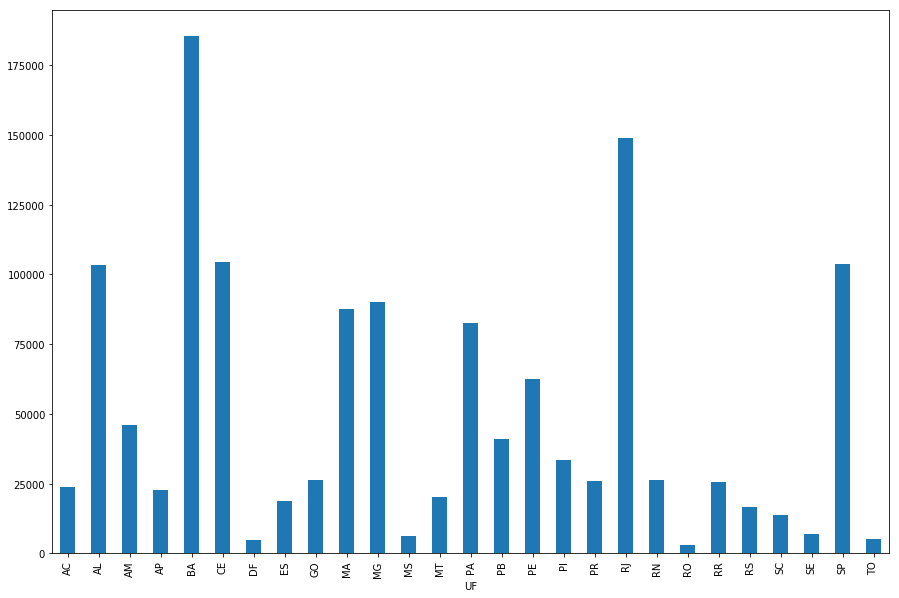

In [12]:
soma_uf = df.groupby('UF').sum()['VALOR PARCELA'];
plt.figure()
soma_uf.plot.bar(figsize=(15,10));

In [13]:
# Cidades com maior volume em valor de pagamento

df.groupby(['UF', 'NOME MUNICÍPIO']).sum()['VALOR PARCELA'].nlargest(10)

UF  NOME MUNICÍPIO
RJ  NOVA IGUACU       82367.0
CE  FORTALEZA         39628.0
BA  SALVADOR          27615.0
RJ  RIO DE JANEIRO    25233.0
PA  BELEM             22723.0
SP  SAO PAULO         15326.0
AP  MACAPA            15302.0
AL  IGREJA NOVA       15270.0
PI  TERESINA          14204.0
AL  MACEIO            12859.0
Name: VALOR PARCELA, dtype: float64

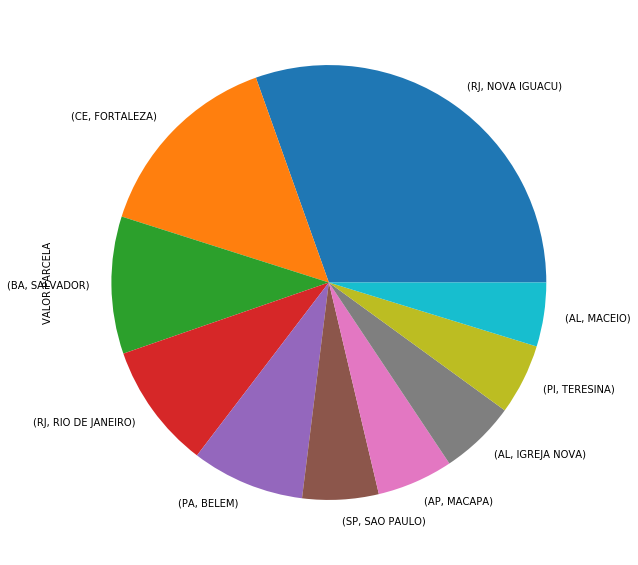

In [14]:
soma_cidade = df.groupby(['UF', 'NOME MUNICÍPIO']).sum()['VALOR PARCELA'].nlargest(10)
plt.figure()
soma_cidade.plot.pie(figsize=(10,10));

In [35]:
# Cidades com maior volume em quantidade

df.groupby(['UF', 'NOME MUNICÍPIO']).count()['VALOR PARCELA'].nlargest(10)

UF  NOME MUNICÍPIO
RJ  NOVA IGUACU       658
CE  FORTALEZA         312
BA  SALVADOR          231
PA  BELEM             186
RJ  RIO DE JANEIRO    154
SP  SAO PAULO         124
PI  TERESINA          112
AL  IGREJA NOVA       108
MG  BELO HORIZONTE    108
AP  MACAPA             97
Name: VALOR PARCELA, dtype: int64

In [49]:
df.groupby(['NIS FAVORECIDO']).count()['VALOR PARCELA'].nlargest(10)

NIS FAVORECIDO
20173798130    10
23797965288    10
13621729312     9
14085487279     9
16235483849     9
16237237829     9
16373918476     9
16589030937     9
20065013446     9
20106545749     9
Name: VALOR PARCELA, dtype: int64

In [52]:
df[df['NIS FAVORECIDO'] == 23797965288]

,MÊS REFERÊNCIA,MÊS COMPETÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,201910,201810,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
27,201910,201811,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
68,201910,201812,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
117,201910,201901,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
184,201910,201902,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
287,201910,201903,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
398,201910,201904,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
660,201910,201905,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
4039,201910,201906,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
9738,201910,201907,AM,271,PAUINI,23797965288,LETICIA LOPES DE PAULA,294.0
